In [76]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using Unitful
using FFTW

pyplot()
j=im
theme(:dracula)


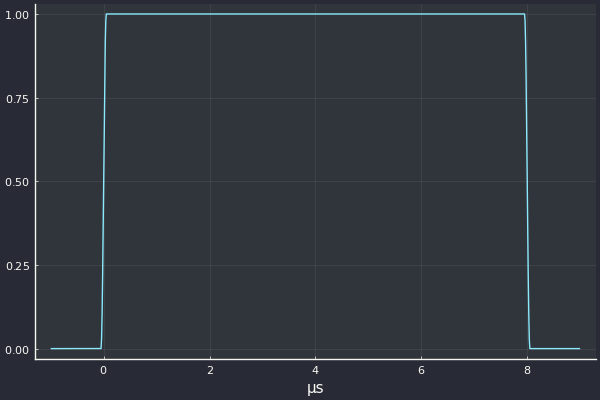

In [77]:
T_TR = 100u"ns"
Δ_F = 20u"MHz"/64
T_SHORT = 8u"μs"
T_LONG = 8u"μs"
T_GI2 = 1.6u"μs"

function w(T, t)
    if t < -T_TR/2 
        return 0
    elseif t < T_TR/2
        return sin(π/2*(0.5+t/T_TR))^2
    elseif t < T-T_TR/2
        return 1
    elseif t < T+T_TR/2
        return sin(π/2*(0.5-(t-T)/T_TR))^2
    else
        return 0
    end
end

t = range(-1u"μs", 9u"μs", length=1000)

using Base: Fix1, Fix2

plot(t, Fix1(w, T_SHORT), legend=false)

In [78]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)

L = OffsetArray([1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 0,
1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1], -26:26)

r_l(t) = w(T_LONG,t)*sum(L[k]*exp(j*k*2π*Δ_F*(t-T_GI2)) for k in eachindex(L))

r_s(t) = w(T_SHORT,t)*sum(S[k]*exp(j*k*2π*Δ_F*t) for k in eachindex(S))

r_s (generic function with 1 method)

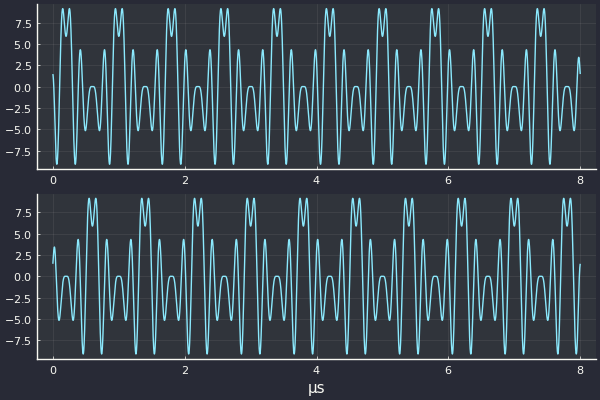

In [79]:
t = range(0u"μs", 8u"μs", length=500000)

rs = r_s.(t)

p1 = plot(t, real(rs), xlabel="")
p2 = plot(t, imag(rs))

plot(p1, p2, layout=(2,1), legend = false)

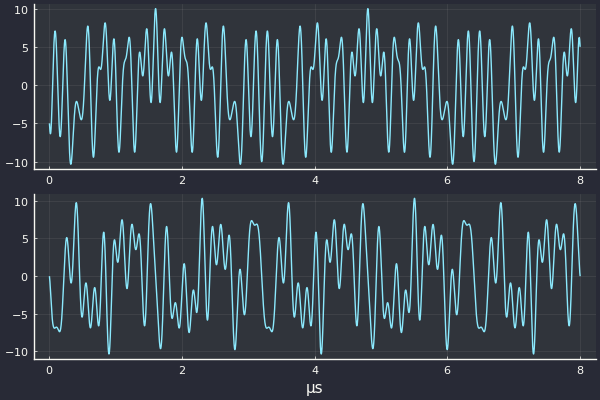

In [80]:
rl = r_l.(t)

p1 = plot(t, real(rl), xlabel="")
p2 = plot(t, imag(rl))

plot(p1, p2, layout=(2,1), legend = false)

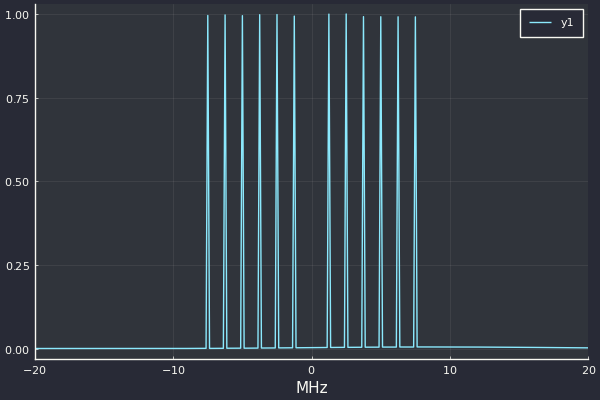

In [81]:
f = fftfreq(length(t), 1/(t[2]-t[1]) |> u"MHz")
plot(f |> fftshift, abs.(fft(rs))./maximum(abs.(fft(rs)))|>fftshift, xlim=(-20u"MHz", 20u"MHz"))

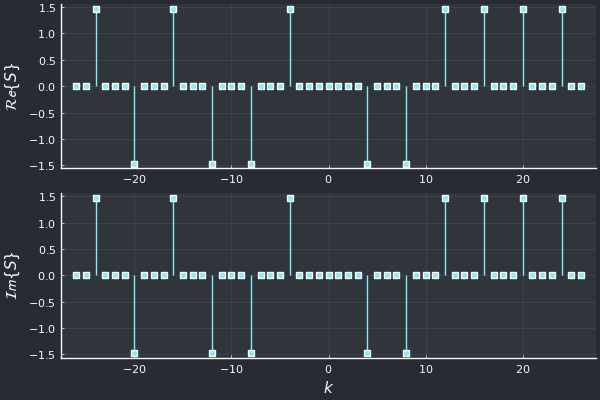

In [82]:

p1 = plot(real(S), line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(imag(S), line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

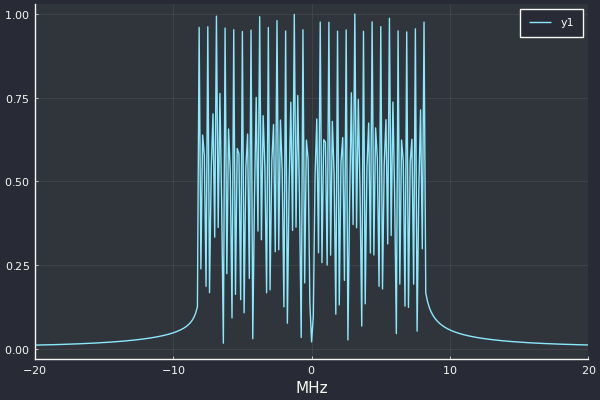

In [83]:
f = fftfreq(length(t), 1/(t[2]-t[1]) |> u"MHz")
plot(f |> fftshift, abs.(fft(rl))./maximum(abs.(fft(rl)))|>fftshift, xlim=(-20u"MHz", 20u"MHz"))

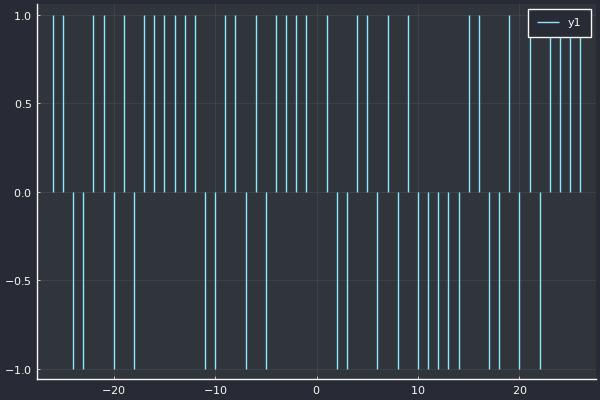

In [84]:
plot(L, line=:stem)

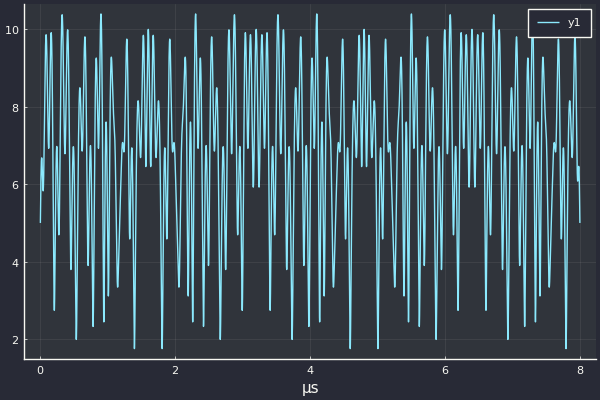

In [85]:

rl = r_l.(t)

plot(t, abs.(rl))

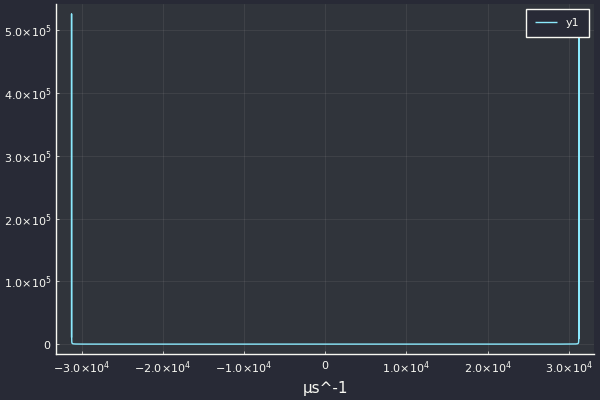

In [86]:
f = fftfreq(length(t), 1/(t[2]-t[1]))
plot(f |> fftshift, abs.(fft(rl)))